<a href="https://colab.research.google.com/github/Calmegi/matstat/blob/main/lab4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import statistics
from scipy import stats as sps
import pandas as pd
import numpy as np
import seaborn as sn
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
%matplotlib inline

**Задание №1**

In [ ]:
x = sps.norm.rvs(loc=10, scale=2, size=200)
y = sps.norm.rvs(loc=5, scale=2, size=200)

In [ ]:
print(x[:10])
print()
print(y[:10])

[ 7.4185015   9.3189662  11.64042401  8.72275012 10.12432402  8.56040215
  9.35135914  9.7605413  12.75309253 10.31688207]

[7.20728342 2.65973326 4.43544007 4.57333416 7.23276273 4.08700589
 3.04414024 7.60919083 6.47387339 4.73173922]


In [ ]:
print(x.mean())
print(x.var())

9.88720870723594
4.039111791447466


In [ ]:
print(y.mean())
print(y.var())

5.331838425931469
4.226291293477266


In [ ]:
sps.pearsonr(x, y)

PearsonRResult(statistic=-0.06448527271445682, pvalue=0.3643074413164177)

In [ ]:
sps.spearmanr(x, y)

SignificanceResult(statistic=-0.08846171154278858, pvalue=0.21289677867069468)

In [ ]:
sps.kendalltau(x, y)

SignificanceResult(statistic=-0.06231155778894472, pvalue=0.19007585106576952)

**Задание №2**

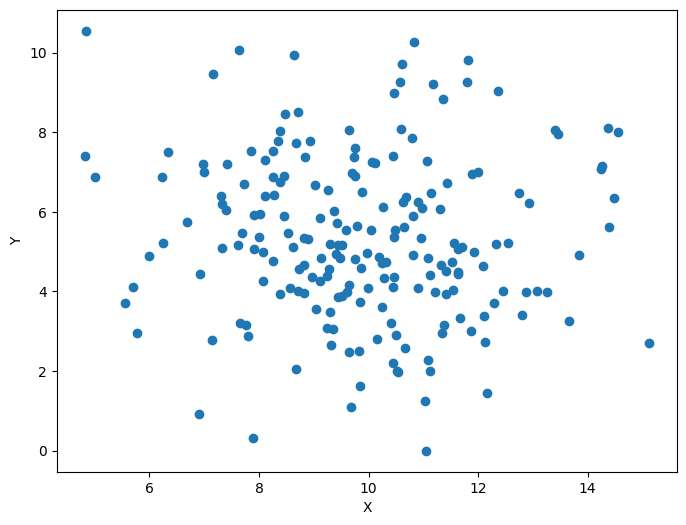

In [ ]:
fig = plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**Задание №3**

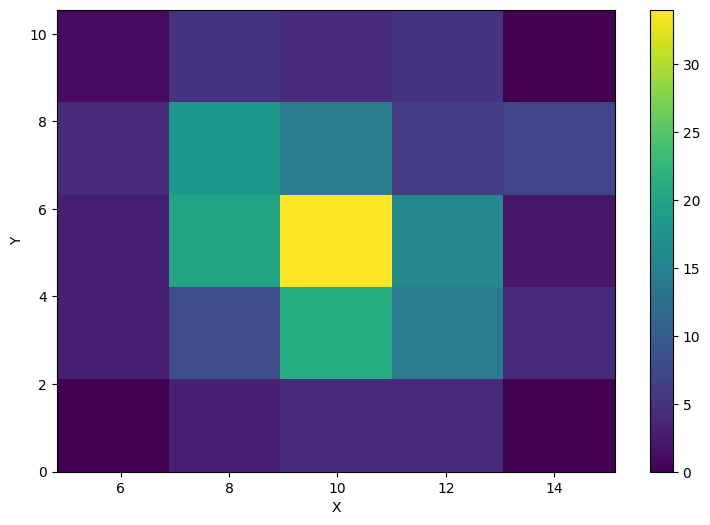

In [ ]:
fig = plt.subplots(figsize=(9, 6))
plt.hist2d(x, y, bins=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar() #каждый цвет - частота пары (x, y)
plt.show()

In [ ]:
obs = hist[0]
obs

array([[ 0.,  3.,  3.,  4.,  1.],
       [ 3.,  8., 20., 18.,  5.],
       [ 4., 21., 34., 14.,  4.],
       [ 4., 14., 16.,  6.,  5.],
       [ 0.,  4.,  2.,  7.,  0.]])

In [ ]:
x_edges = hist[1]
x_edges

array([ 4.82618929,  6.88403027,  8.94187124, 10.99971221, 13.05755318,
       15.11539416])

In [ ]:
y_edges = hist[2]
y_edges

array([-4.72158176e-03,  2.10586491e+00,  4.21645140e+00,  6.32703789e+00,
        8.43762438e+00,  1.05482109e+01])

In [ ]:
sps.chi2_contingency(obs)[0:3]

(21.530446465511403, 0.1590100708861939, 16)

In [ ]:
sps.chi2_contingency(obs)[3]

array([[ 0.605,  2.75 ,  4.125,  2.695,  0.825],
       [ 2.97 , 13.5  , 20.25 , 13.23 ,  4.05 ],
       [ 4.235, 19.25 , 28.875, 18.865,  5.775],
       [ 2.475, 11.25 , 16.875, 11.025,  3.375],
       [ 0.715,  3.25 ,  4.875,  3.185,  0.975]])

**Задание №4**

In [ ]:
U = []
def U(x, y, lmbd):
  return lmbd * x + (1 - lmbd) * y

In [ ]:
cor_coef = []
r_sp = []
tau_kd = []
l = []
for i in range(201):
  lmbd = i / 200
  l.append(lmbd)
  u = U(x, y, lmbd)
  cor_coef.append(sps.pearsonr(x, u)[0])
  r_sp.append(sps.spearmanr(x, u)[0])
  tau_kd.append(sps.kendalltau(x, u)[0])

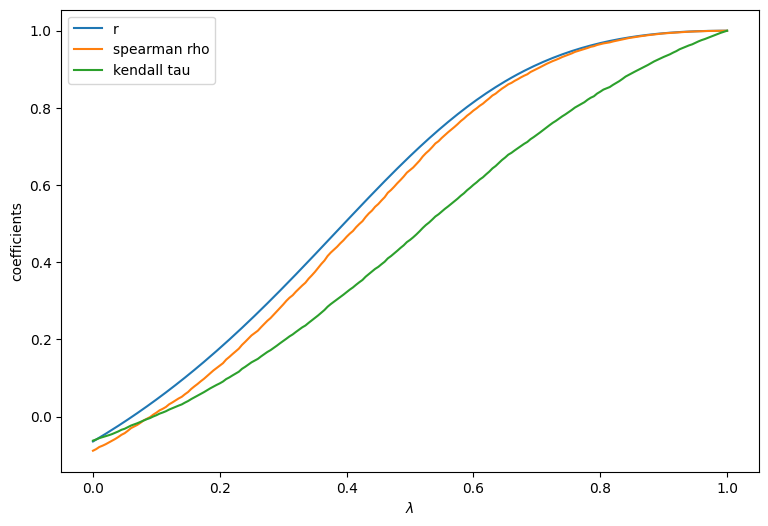

In [ ]:
fig = plt.subplots(figsize=(9, 6))
plt.plot(l, cor_coef, label="r")
plt.plot(l, r_sp, label="spearman rho")
plt.plot(l, tau_kd, label="kendall tau")
plt.xlabel("$\lambda$")
plt.ylabel("coefficients")
plt.legend()
plt.show()

In [ ]:
V = []
def V(x, y, lmbd):
  return lmbd * x ** 3 + (1 - lmbd) * y ** 3

In [ ]:
cor_coef = []
r_sp = []
tau_kd = []
l = []
for i in range(101):
  lmbd = i / 100
  l.append(lmbd)
  v = V(x, y, lmbd)
  cor_coef.append(sps.pearsonr(x, v)[0])
  r_sp.append(sps.spearmanr(x, v)[0])
  tau_kd.append(sps.kendalltau(x, v)[0])

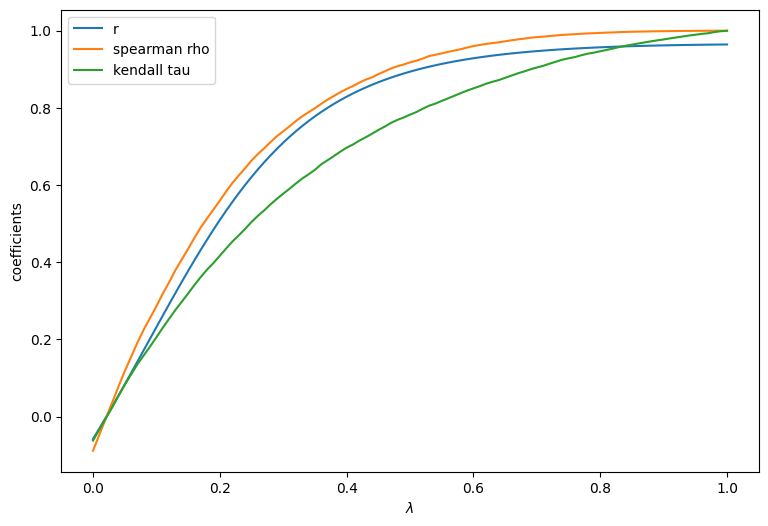

In [ ]:
fig = plt.subplots(figsize=(9,6))
plt.plot(l, cor_coef, label="r")
plt.plot(l, r_sp, label="spearman rho")
plt.plot(l, tau_kd, label="kendall tau")
plt.xlabel("$\lambda$")
plt.ylabel("coefficients")
plt.legend()
plt.show()

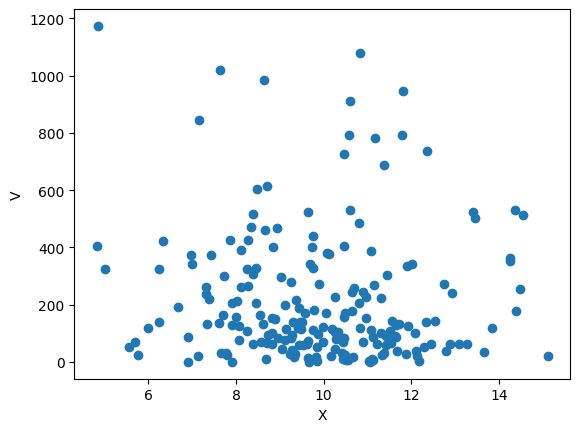

In [ ]:
plt.scatter(x, V(x, y, 0))
plt.xlabel("X")
plt.ylabel("V")
plt.show()

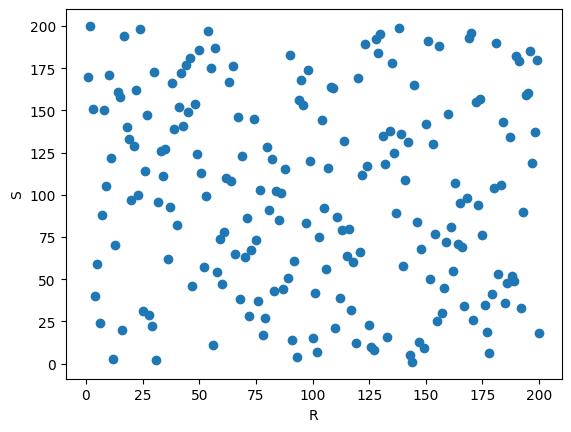

In [ ]:
plt.scatter(sps.rankdata(x), sps.rankdata(V(x, y, 0)))
plt.xlabel("R")
plt.ylabel("S")
plt.show()

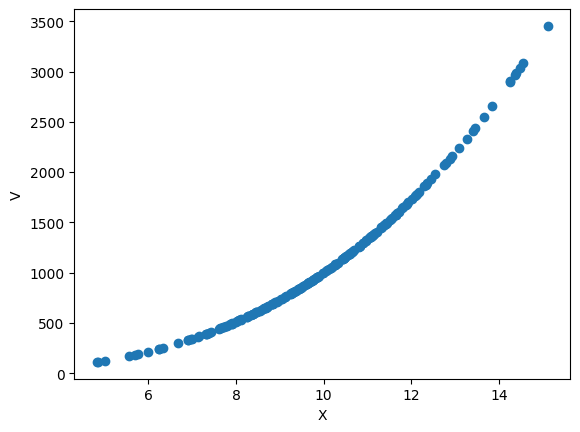

In [ ]:
plt.scatter(x, V(x, y, 1))
plt.xlabel("X")
plt.ylabel("V")
plt.show()

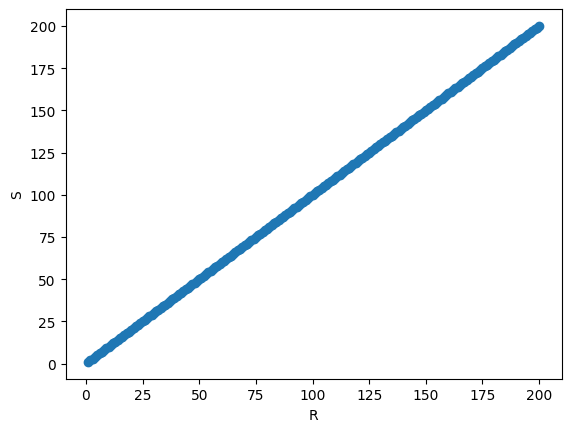

In [ ]:
plt.scatter(sps.rankdata(x), sps.rankdata(V(x, y, 1)))
plt.xlabel("R")
plt.ylabel("S")
plt.show()